In [6]:
import json
import pandas as pd

In [2]:
with open("../data/items.json", "r") as items_json:
    items = json.load(items_json)

In [5]:
for i in range(len(items)):
    items[i]["metadata_length"] = len(items[i]["metadata"].split("\u00b7"))

In [10]:
items_df = pd.DataFrame(items)

<AxesSubplot:xlabel='category'>

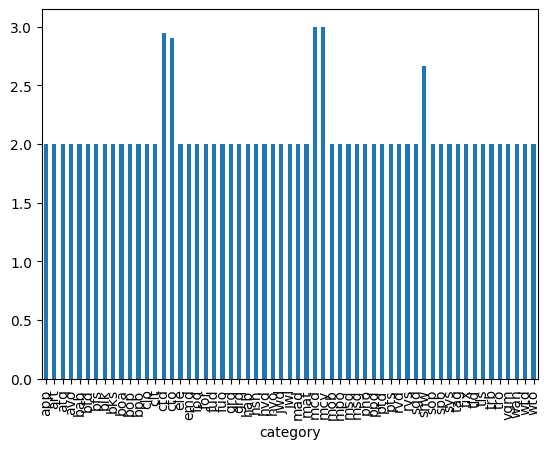

In [13]:
items_df.groupby("category")["metadata_length"].mean().plot.bar()

In [14]:
cat2metadata_length = items_df.groupby("category")["metadata_length"].mean()

In [28]:
cats = cat2metadata_length[cat2metadata_length != 2.0].index.values

In [19]:
multilength_class_items = items_df[items_df["category"].isin(cat2metadata_length[cat2metadata_length != 2.0].index)]

In [34]:
multilength_class_items[multilength_class_items["metadata_length"] == 2]

,title,metadata,price,link,images,num_images,category,metadata_length
774,"2019 ford transit connect xl cargo van, one owner",7h ago·136k mi,14600.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00O0O_cAEmePNJa...,1,ctd,2
776,2019 ford transit connect xlt cargo van w/ bac...,7h ago·159k mi,13600.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/01616_lbhfJWsVx...,1,ctd,2
787,2017 ford focus sel w/ warranty & new inspecti...,7h ago·107k mi,8900.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00b0b_kIObpviMg...,1,ctd,2
800,2016 nissan altima 2.5 s w/ warranty & new ins...,7h ago·111k mi,9600.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00M0M_5RW4ZFCb4...,1,ctd,2
803,2016 nissan rogue s awd w/ new inspección stic...,8h ago·118k mi,10900.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00o0o_3pNB468H1...,1,ctd,2
809,2012 mazda3 i sport 5-speed manual w/ new insp...,8h ago·161k mi,5900.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00s0s_kUy1PwxcN...,1,ctd,2
814,2011 jeep wrangler sport 4x4 w/ clean title & ...,8h ago·168k mi,10900.0,https://providence.craigslist.org/ctd/d/centra...,[https://images.craigslist.org/00000_bg6XWRoFF...,1,ctd,2
820,**mazda 3**,8h ago·145k mi,3900.0,https://providence.craigslist.org/cto/d/east-p...,[https://images.craigslist.org/00Q0Q_l7kwDXGjG...,1,cto,2
1648,2000 chevrolet corvette convertible,3/12·143k mi,12500.0,https://providence.craigslist.org/cto/d/glenda...,[https://images.craigslist.org/00c0c_bJuTc1uxd...,2,cto,2
1707,"2003 honda 300 ex, low hrs, no time to ride, r...",3/12·barrington,2400.0,https://providence.craigslist.org/snw/d/rivers...,[https://images.craigslist.org/00n0n_i6afC0UJX...,1,snw,2


In [33]:
items_df[items_df["metadata_length"] == 1]

,title,metadata,price,link,images,num_images,category,metadata_length


In [35]:
def data_clean(item):
    cat = item["category"]
    metadata = item["metadata"].strip().split("\u00b7")
    if cat in cats:
        # Vehicles
        if len(metadata) == 3:
            date, mileage, location = metadata
            item["date"] = date
            item["mileage"] = mileage
            item["location"] = location
        else:
            date, mileage = metadata
            item["date"] = date
            if mileage == "barrington":
                # Exception
                item['location'] = mileage
                item["mileage"] = None
            else:
                item["mileage"] = mileage
                item["location"] = None
    else:
        # Non-vehicles
        date, location = metadata
        item["date"] = date
        item["location"] = location
        item["mileage"] = None
    
    return item

In [36]:
newItems = []
for i in range(len(items)):
    newItems.append(data_clean(items[i]))

In [37]:
newItems[0]

{'title': 'kitchenaid measuring cups & spoons plastic',
 'metadata': '7 mins ago·westerly',
 'price': 5.0,
 'link': 'https://providence.craigslist.org/hsh/d/westerly-kitchenaid-measuring-cups/7726876655.html',
 'images': ['https://images.craigslist.org/00C0C_eGe6uOxr3zC_07K0ak_300x300.jpg'],
 'num_images': 1,
 'category': 'hsh',
 'metadata_length': 2,
 'date': '7 mins ago',
 'location': 'westerly',
 'mileage': None}

In [51]:
items_df["metadata"].head(900).tail(50)

850                 8h ago·barrington
851                 8h ago·barrington
852                 8h ago·providence
853             8h ago·east greenwich
854         8h ago·134k mi·providence
855              8h ago·glocester, ri
856               8h ago·glocester,ri
857              8h ago·glocester, ri
858              8h ago·glocester, ri
859              8h ago·glocester, ri
860                   8h ago·cranston
861              8h ago·glocester, ri
862              8h ago·glocester, ri
863              8h ago·glocester, ri
864          8h ago·140k mi·attleboro
865              8h ago·glocester, ri
866              8h ago·glocester, ri
867              8h ago·glocester, ri
868              8h ago·glocester, ri
869                     3/13·coventry
870                     3/13·coventry
871                     3/13·coventry
872                     3/13·coventry
873                     3/13·coventry
874                     3/13·johnston
875                       3/13·exeter
876         

In [54]:
def preprocess_date(s: str):
    if (s is not None) and ("/" in s):
        return s
    return "3/14"

In [55]:
for i in range(len(newItems)):
    newItems[i]["date"] = preprocess_date(newItems[i]["date"])

In [57]:
newItems[-1]

{'title': '2024 rawmaxx 7x14 14k ramps dump trailer',
 'metadata': '3/11·cm truck & trailer sales llc',
 'price': 10495.0,
 'link': 'https://providence.craigslist.org/trb/d/chichester-2024-rawmaxx-7x14-14k-ramps/7726231047.html',
 'images': ['https://images.craigslist.org/00e0e_juAS8puBLHY_0cU09G_300x300.jpg'],
 'num_images': 1,
 'category': 'trb',
 'metadata_length': 2,
 'date': '3/11',
 'location': 'cm truck & trailer sales llc',
 'mileage': None}

In [58]:
with open("../data/preprocessed_items.json", "w") as preprocessed_item_json:
    json.dump(newItems, preprocessed_item_json)

In [59]:
len(newItems)

3254